# 1.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df=pd.read_csv("complaints.csv")
df.head()

C:\Users\Nikhil Kumar Bachha\AppData\Local\Temp\ipykernel_10200\864705133.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("complaints.csv")


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-01-24,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33578,NaN,Consent not provided,Web,2024-01-24,Closed with explanation,Yes,NaN,8205544
1,2024-02-26,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company believes it acted appropriately as aut...,"CCS Financial Services, Inc.",NC,27536,NaN,Consent not provided,Web,2024-02-26,Closed with non-monetary relief,Yes,NaN,8423775
2,2024-01-26,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,"The companies, along with the credit reporting...",NaN,"EQUIFAX, INC.",NC,28804,NaN,Consent provided,Web,2024-01-26,Closed with non-monetary relief,Yes,NaN,8232435
3,2024-01-26,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,In accordance with the Fair Credit Reporting a...,NaN,"EQUIFAX, INC.",GA,30213,NaN,Consent provided,Web,2024-01-26,Closed with explanation,Yes,NaN,8231458
4,2024-01-18,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,XXXX XXXX XXXX XXXX XXXX XXXX XXXX - XXXX Acco...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,752XX,NaN,Consent provided,Web,2024-01-18,Closed with non-monetary relief,Yes,NaN,8179637


In [12]:
df.shape

(5157101, 18)

In [13]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5157101 entries, 0 to 5157100
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 708.

In [15]:
df.isnull().sum()

Date received                         0
Product                               0
Sub-product                      235292
Issue                                 2
Sub-issue                        734976
Consumer complaint narrative    3344052
Company public response         2685701
Company                               0
State                             45571
ZIP code                          30225
Tags                            4674703
Consumer consent provided?      1024775
Submitted via                         0
Date sent to company                  0
Company response to consumer         14
Timely response?                      0
Consumer disputed?              4388785
Complaint ID                          0
dtype: int64

In [16]:
#Sub-product, Sub-issue, State, ZIP code these are categorial data so we can replace the null values by mode value
mode_sub_product=df["Sub-product"].mode()[0]
print("mode of sub-product :",mode_sub_product)
mode_sub_issue=df["Sub-issue"].mode()[0]
print("mode of sub-issue :", mode_sub_issue)
mode_state=df["State"].mode()[0]
print("mode of state:",mode_state)
mode_zip=df["ZIP code"].mode()[0]
print("mode of zip-code :",mode_zip)
mode_Consumer_consent_provided=df["Consumer consent provided?"].mode()[0]
print("mode of mode_Consumer_consent_provided :",mode_Consumer_consent_provided)
# Consumer complaint narrative, Company public response, Tags are text data so we can replace the null vaule by "Unknown" text
# Consumer consent provided and Consumer disputed?  represent a choice so we can replace it by "Not specified" 

mode of sub-product : Credit reporting
mode of sub-issue : Information belongs to someone else
mode of state: FL
mode of zip-code : XXXXX
mode of mode_Consumer_consent_provided : Consent not provided


In [17]:
new_df=df.fillna({"Sub-product":mode_sub_product,
           "Sub-issue":mode_sub_issue,
           "State":mode_state,
           "ZIP code":mode_zip,
           "Consumer complaint narrative":"Unknown",
           "Company public response":"unknown",
           "Tags":"Unknown",
           "Consumer consent provided":"Not specified",
           "Consumer disputed?":"Not specified",
           "Consumer consent provided?":mode_Consumer_consent_provided})

In [9]:
new_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-01-24,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,Unknown,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33578,Unknown,Consent not provided,Web,2024-01-24,Closed with explanation,Yes,Not specified,8205544
1,2024-02-26,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,Unknown,Company believes it acted appropriately as aut...,"CCS Financial Services, Inc.",NC,27536,Unknown,Consent not provided,Web,2024-02-26,Closed with non-monetary relief,Yes,Not specified,8423775
2,2024-01-26,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,"The companies, along with the credit reporting...",unknown,"EQUIFAX, INC.",NC,28804,Unknown,Consent provided,Web,2024-01-26,Closed with non-monetary relief,Yes,Not specified,8232435
3,2024-01-26,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,In accordance with the Fair Credit Reporting a...,unknown,"EQUIFAX, INC.",GA,30213,Unknown,Consent provided,Web,2024-01-26,Closed with explanation,Yes,Not specified,8231458
4,2024-01-18,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,XXXX XXXX XXXX XXXX XXXX XXXX XXXX - XXXX Acco...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,752XX,Unknown,Consent provided,Web,2024-01-18,Closed with non-monetary relief,Yes,Not specified,8179637


In [18]:
new_df.isnull().sum()

Date received                    0
Product                          0
Sub-product                      0
Issue                            2
Sub-issue                        0
Consumer complaint narrative     0
Company public response          0
Company                          0
State                            0
ZIP code                         0
Tags                             0
Consumer consent provided?       0
Submitted via                    0
Date sent to company             0
Company response to consumer    14
Timely response?                 0
Consumer disputed?               0
Complaint ID                     0
dtype: int64

In [19]:
new_df.dropna(inplace=True)

In [20]:
new_df.isnull().sum()

Date received                   0
Product                         0
Sub-product                     0
Issue                           0
Sub-issue                       0
Consumer complaint narrative    0
Company public response         0
Company                         0
State                           0
ZIP code                        0
Tags                            0
Consumer consent provided?      0
Submitted via                   0
Date sent to company            0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
Complaint ID                    0
dtype: int64

In [13]:
new_df.shape

(5157085, 18)

## Top 10 Product and sub-product by most Complaints

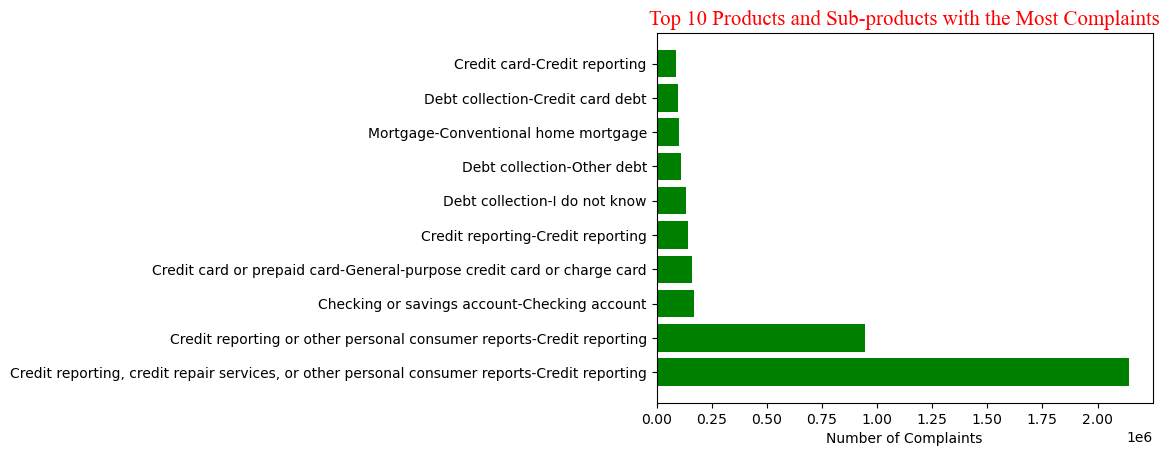

In [14]:
product_subproduct_counts = new_df.groupby(['Product', 'Sub-product']).size().reset_index(name='Count')
product_subproduct_counts = product_subproduct_counts.sort_values(by='Count', ascending=False)
top_10 = product_subproduct_counts.head(10)
plt.barh(top_10['Product'] + "-" + top_10['Sub-product'], top_10['Count'], color='g')
plt.xlabel('Number of Complaints')
plt.title('Top 10 Products and Sub-products with the Most Complaints',color="r",fontsize=15,family="Times New Roman")
plt.show()

## Top 10 common Issue 

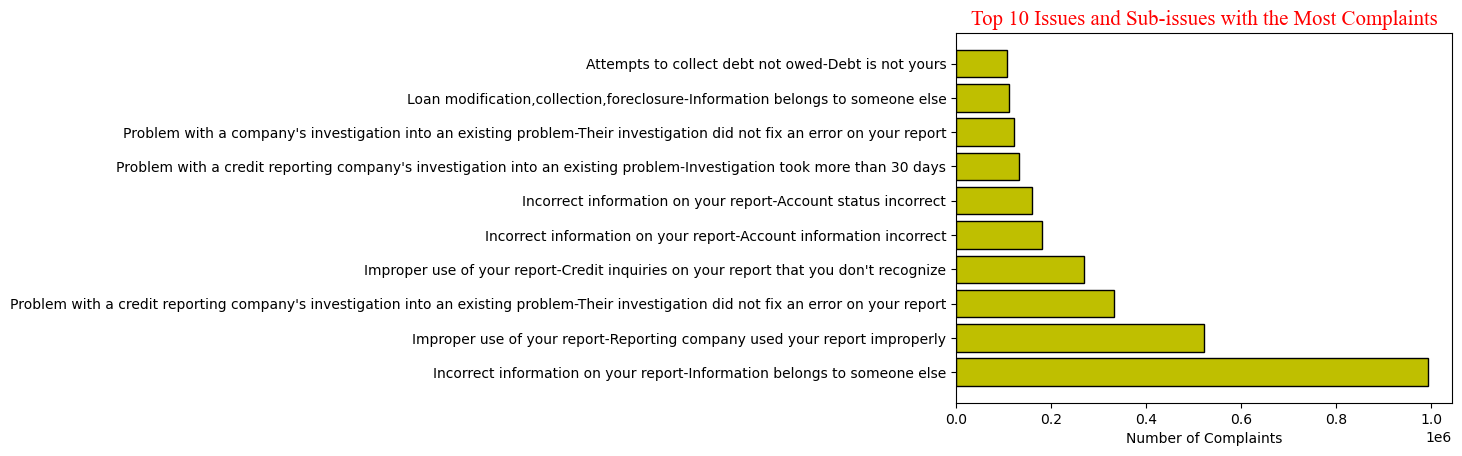

In [16]:
issue_subissue_counts = new_df.groupby(['Issue', 'Sub-issue']).size().reset_index(name='Count')
issue_subissue_counts = issue_subissue_counts.sort_values(by='Count', ascending=False)
top_10 = issue_subissue_counts.head(10)
plt.barh(top_10['Issue'] + "-" + top_10['Sub-issue'], top_10['Count'], color='y',edgecolor="k")
plt.xlabel('Number of Complaints')
plt.title('Top 10 Issues and Sub-issues with the Most Complaints',color="r",fontsize=15,family="Times New Roman")
plt.show()

### We can inferece that the top 10 issues and sub-issues with the most number of complaints are "Incorrect information on your report-Informtion belongs to someone else"



## Trends of Complain over last 10 year

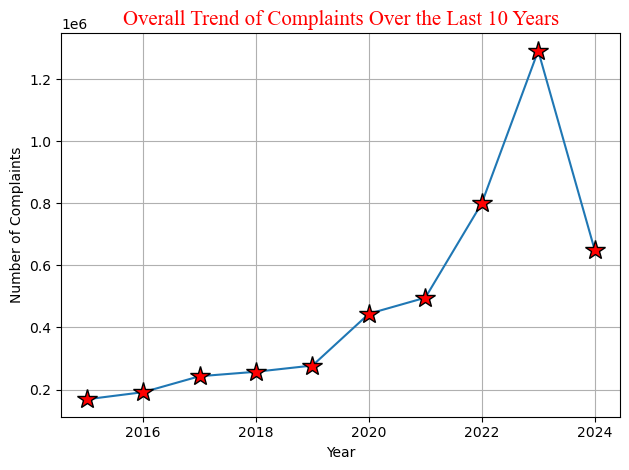

In [24]:
new_df['Date received'] = pd.to_datetime(new_df['Date received']) # Convert 'Date received' to datetime
new_df['Year'] = new_df['Date received'].dt.year # Extract year and month from the 'Date received' column
new_df_last_10_years = new_df[new_df['Year'] >= new_df['Year'].max() - 9] # Filter the data for the last 10 years
yearly_complaints = new_df_last_10_years.groupby('Year').size().reset_index(name='Complaints') # Group by year and count the number of complaints
plt.plot(yearly_complaints['Year'], yearly_complaints['Complaints'], marker='*',ms=15,mfc="r",mec="k")
plt.xlabel('Year')
plt.ylabel('Number of Complaints')
plt.title('Overall Trend of Complaints Over the Last 10 Years',color="r",fontsize=15,family="Times New Roman")
plt.grid(True)
plt.tight_layout()
plt.show()

### From the line chart we can see that overall trends in complaints rise till the year 2023 but after 2023 there is significants drop in number of complaints. Which means compaines have worked on it to reduce the number of complaints.

## Distribution of Complaints by Product

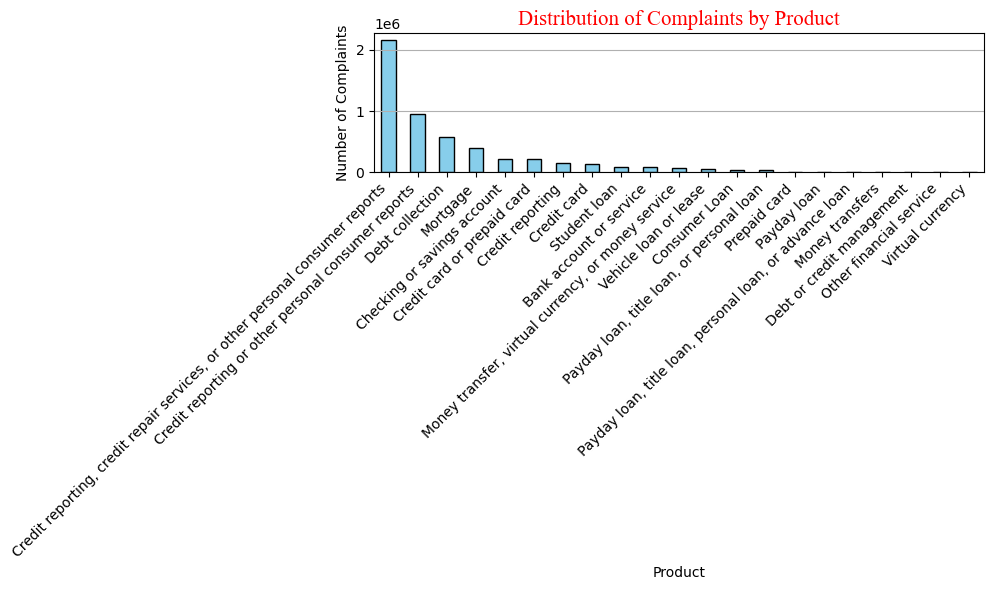

In [23]:
product_counts = new_df['Product'].value_counts()
plt.figure(figsize=(10, 6))
product_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Complaints by Product',color="r",fontsize=15,family="Times New Roman")
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Here we are checking the count of complaints for a products which says that credit reporting, credit repair services or other personal consumer report is the type of complaints are the most


# 2. Given an unsorted array of integers, find the length of the longest continuous increasing subsequence (subarray). 

In [43]:
l = [1, 3, 5, 4, 7]
longest_length = 1
current_length = 1
for i in range(1, len(l)):
    if l[i] > l[i - 1]:
        current_length += 1
        longest_length = max(longest_length, current_length)
    else:
        current_length = 1
print("length of longest continuous increasing subsequence is ", longest_length)

length of longest continuous increasing subsequence is  3


# 3. Given a list of non negative integers, arrange them such that they form the largest number.

In [7]:
def largestNumber(nums):
    nums = [str(num) for num in nums]
    nums.sort(key=lambda x: x*10,reverse=True) # ensuring  numbers with more digits come first in the sorting order.
    return ''.join(nums)
nums1 = [10, 2]
print(largestNumber(nums1))  
nums2 = [3, 30, 34, 5, 9]
print(largestNumber(nums2)) 

210
9534330


# 4. Store all the "servlet-name", and "servlet-class" to a csv file from the attached sample_json.json file using Python.

In [65]:
data=pd.read_json("DT A1 sample_json.json")
data

,web-app
servlet,"[{'servlet-name': 'cofaxCDS', 'servlet-class':..."
servlet-mapping,"{'cofaxCDS': '/', 'cofaxEmail': '/cofaxutil/ae..."
taglib,"{'taglib-uri': 'cofax.tld', 'taglib-location':..."


In [69]:
# Extract  servlet data
servlet_data = data['web-app']['servlet']
df1=pd.DataFrame(servlet_data)
df1

,servlet-name,servlet-class,init-param
0,cofaxCDS,org.cofax.cds.CDSServlet,{'configGlossary:installationAt': 'Philadelphi...
1,cofaxEmail,org.cofax.cds.EmailServlet,"{'mailHost': 'mail1', 'mailHostOverride': 'mai..."
2,cofaxAdmin,org.cofax.cds.AdminServlet,NaN
3,fileServlet,org.cofax.cds.FileServlet,NaN
4,cofaxTools,org.cofax.cms.CofaxToolsServlet,"{'templatePath': 'toolstemplates/', 'log': 1, ..."


In [82]:
#extract "servlet-name" and "servlet-class"
df2=df1.iloc[:,0:2]
df2

,servlet-name,servlet-class
0,cofaxCDS,org.cofax.cds.CDSServlet
1,cofaxEmail,org.cofax.cds.EmailServlet
2,cofaxAdmin,org.cofax.cds.AdminServlet
3,fileServlet,org.cofax.cds.FileServlet
4,cofaxTools,org.cofax.cms.CofaxToolsServlet


In [85]:
# sote the data in csv
df2.to_csv("servlet_data.csv",index=False)